In [106]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.6,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,266.554,8.3,17776,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,91.055,7.5,23164,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,76.323,7.9,18970,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,51.502,7.4,15668,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en']


# Dropping invalid Data

In [108]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



In [109]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6707 non-null   object 
 1   Adult              6707 non-null   object 
 2   GenreList          6707 non-null   object 
 3   Budget             6707 non-null   float64
 4   Popularity         6707 non-null   float64
 5   VoteAvg            6707 non-null   float64
 6   VoteCount          6707 non-null   float64
 7   Overview           6691 non-null   object 
 8   Tagline            5563 non-null   object 
 9   Revenue            6707 non-null   float64
 10  ReleaseDate        6707 non-null   object 
 11  Runtime            6707 non-null   float64
 12  OriginalLanguage   6707 non-null   object 
 13  ProductionCompany  6707 non-null   object 
 14  ProductionCountry  6707 non-null   object 
 15  SpokenLanguage     6707 non-null   object 
dtypes: float64(6), object(10

## Calculate and Insert Profit Variable

In [110]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [111]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [112]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

In [113]:
Movie_CleanedData.head(1000)

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,Profit,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage,Year,Month
0,Avengers: Endgame,False,"[Adventure, Science Fiction, Action]",356000000.0,266.554,8.3,17776.0,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2.797801e+09,2.441801e+09,2019-04-24,181.0,en,"[[Marvel Studios, US]]",[US],"[en, ja, xh]",2019,4
1,Avatar,False,"[Action, Adventure, Fantasy, Science Fiction]",237000000.0,91.055,7.5,23164.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2.787965e+09,2.550965e+09,2009-12-10,162.0,en,"[[Dune Entertainment, US], [Lightstorm Enterta...","[US, GB]","[en, es]",2009,12
2,Titanic,False,"[Drama, Romance]",200000000.0,76.323,7.9,18970.0,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2.187464e+09,1.987464e+09,1997-11-18,194.0,en,"[[Paramount, US], [Lightstorm Entertainment, U...",[US],"[en, fr, de, sv, it, ru]",1997,11
3,Star Wars: The Force Awakens,False,"[Action, Adventure, Science Fiction, Fantasy]",245000000.0,51.502,7.4,15668.0,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2.068224e+09,1.823224e+09,2015-12-15,136.0,en,"[[Lucasfilm Ltd., US], [Bad Robot, US]]",[US],[en],2015,12
4,Avengers: Infinity War,False,"[Adventure, Action, Science Fiction]",300000000.0,283.248,8.3,21470.0,As the Avengers and their allies have continue...,An entire universe. Once and for all.,2.046240e+09,1.746240e+09,2018-04-25,149.0,en,"[[Marvel Studios, US]]",[US],"[en, xh]",2018,4
5,Jurassic World,False,"[Action, Adventure, Science Fiction, Thriller]",150000000.0,68.575,6.6,16686.0,Twenty-two years after the events of Jurassic ...,The park is open.,1.671713e+09,1.521713e+09,2015-06-06,124.0,en,"[[Amblin Entertainment, US], [Legendary Pictur...",[US],[en],2015,6
6,The Lion King,False,"[Adventure, Family, Animation]",260000000.0,94.877,7.2,7563.0,"Simba idolizes his father, King Mufasa, and ta...",The King has Returned.,1.656943e+09,1.396943e+09,2019-07-12,118.0,en,"[[Walt Disney Pictures, US], [Fairview Enterta...",[US],[en],2019,7
7,The Avengers,False,"[Science Fiction, Action, Adventure]",220000000.0,139.977,7.7,24419.0,When an unexpected enemy emerges and threatens...,Some assembly required.,1.518816e+09,1.298816e+09,2012-04-25,143.0,en,"[[Marvel Studios, US], [Paramount, US]]",[US],"[en, hi, ru]",2012,4
8,Furious 7,False,"[Action, Thriller]",190000000.0,73.657,7.3,8239.0,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,1.515048e+09,1.325048e+09,2015-04-01,137.0,en,"[[Abu Dhabi Film Commission, ], [Universal Pic...",[US],[en],2015,4
9,Frozen II,False,"[Family, Animation, Adventure, Comedy, Fantasy...",150000000.0,154.917,7.3,7232.0,"Elsa, Anna, Kristoff and Olaf head far into th...",The past is not what it seems.,1.450027e+09,1.300027e+09,2019-11-20,103.0,en,"[[Walt Disney Pictures, US], [Walt Disney Anim...",[US],[en],2019,11


In [114]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6707 non-null   object 
 1   Adult              6707 non-null   object 
 2   GenreList          6707 non-null   object 
 3   Budget             6707 non-null   float64
 4   Popularity         6707 non-null   float64
 5   VoteAvg            6707 non-null   float64
 6   VoteCount          6707 non-null   float64
 7   Overview           6691 non-null   object 
 8   Tagline            5563 non-null   object 
 9   Revenue            6707 non-null   float64
 10  Profit             6707 non-null   float64
 11  ReleaseDate        6707 non-null   object 
 12  Runtime            6707 non-null   float64
 13  OriginalLanguage   6707 non-null   object 
 14  ProductionCompany  6707 non-null   object 
 15  ProductionCountry  6707 non-null   object 
 16  SpokenLanguage     6707 

## Create Columns for Categorical Data


In [115]:
# #change string in list format to list
# for i in range(len(Movie_CleanedData)):
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
#     Movie_CleanedData.at[i,'GenreList'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
#     Movie_CleanedData.at[i,'ProductionCompany'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
#     Movie_CleanedData.at[i,'ProductionCountry'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
#     Movie_CleanedData.at[i,'SpokenLanguage'] = x

    
# #count max number each category, to create number of columns
# genrecount,production_company_count,production_country_count,spoken_language_count = 0,0,0,0

# for i in range(len(Movie_CleanedData)):
#     if len(Movie_CleanedData.loc[i,'GenreList'])>genrecount:
#         genrecount = len(Movie_CleanedData.loc[i,'GenreList'])
#     if len(Movie_CleanedData.loc[i,'ProductionCompany'])>production_company_count:
#         production_company_count = len(Movie_CleanedData.loc[i,'ProductionCompany'])
#     if len(Movie_CleanedData.loc[i,'ProductionCountry'])>production_country_count:
#         production_country_count = len(Movie_CleanedData.loc[i,'ProductionCountry'])
#     if len(Movie_CleanedData.loc[i,'SpokenLanguage'])>spoken_language_count:
#         spoken_language_count = len(Movie_CleanedData.loc[i,'SpokenLanguage'])
        
       
# print(genrecount)
# print(production_company_count)
# print(production_country_count)
# print(spoken_language_count)
        
# #to catch and ignore list out of index, replace with NONE.
# def catch(var,i):
#     try:
#         return var[i]
#     except Exception as e:
#         return None
# def catch2(var,i):
#     try:
#         return var[i][0]
#     except Exception as e:
#         return None
    
# #replace
# for i in range(1,genrecount+1):
#     Movie_CleanedData.loc[:, 'Genre'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.GenreList]
    
# for i in range(1,production_company_count+1):
#     Movie_CleanedData.loc[:, 'ProductionCompany'+str(i)] = [catch2(x, i-1) for x in Movie_CleanedData.ProductionCompany]
    
# for i in range(1,production_country_count+1):    
#     Movie_CleanedData.loc[:, 'ProductionCountry'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.ProductionCountry]

# for i in range(1,spoken_language_count+1):    
#     Movie_CleanedData.loc[:, 'SpokenLanguage'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.SpokenLanguage]

In [116]:
Movie_CleanedData.describe()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
count,6.707000e+03,6707.000000,6707.000000,6707.000000,6.707000e+03,6.707000e+03,6707.000000,6707.000000,6707.000000
mean,2.950852e+07,20.508295,6.410258,1612.965558,8.652781e+07,5.701928e+07,111.049053,2001.340092,6.886686
std,4.161330e+07,155.826177,1.009427,2762.836250,1.714662e+08,1.449594e+08,23.250644,16.356842,3.417379
min,4.000000e+02,0.600000,0.000000,0.000000,3.343190e+05,-9.635208e+08,0.000000,1913.000000,1.000000
25%,5.000000e+06,8.279000,5.900000,136.000000,6.500000e+06,-6.321245e+05,96.000000,1995.000000,4.000000
50%,1.500000e+07,11.513000,6.500000,577.000000,2.556292e+07,9.200000e+06,107.000000,2006.000000,7.000000
75%,3.600000e+07,18.182000,7.100000,1756.000000,9.000005e+07,5.510605e+07,122.000000,2013.000000,10.000000
max,9.653130e+08,12276.164000,10.000000,28790.000000,2.797801e+09,2.550965e+09,339.000000,2021.000000,12.000000


## EXPLORATORY ANALYSIS

## Numeric Data

In [117]:
Q1 = np.quantile(Movie_CleanedData.VoteCount, 0.25)
mean = np.quantile(Movie_CleanedData.VoteCount, 0.5)
mean_Avg = np.quantile(Movie_CleanedData.VoteAvg, 0.5)
for i in range(len(Movie_CleanedData)):
    if Movie_CleanedData.VoteCount[i]<Q1:
        Movie_CleanedData.VoteCount[i] = mean
        Movie_CleanedData.VoteAvg[i]= mean_Avg
#     if Movie_CleanedData.loc[i,'VoteCount']<Q1:
#         Movie_CleanedData.loc[i,'VoteCount'] = mean
#         Movie_CleanedData.loc[i,'VoteAvg'] = mean_Avg

<ipython-input-117-a220129c0b85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_CleanedData.VoteCount[i] = mean
<ipython-input-117-a220129c0b85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_CleanedData.VoteAvg[i]= mean_Avg


In [118]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6707 non-null   object 
 1   Adult              6707 non-null   object 
 2   GenreList          6707 non-null   object 
 3   Budget             6707 non-null   float64
 4   Popularity         6707 non-null   float64
 5   VoteAvg            6707 non-null   float64
 6   VoteCount          6707 non-null   float64
 7   Overview           6691 non-null   object 
 8   Tagline            5563 non-null   object 
 9   Revenue            6707 non-null   float64
 10  Profit             6707 non-null   float64
 11  ReleaseDate        6707 non-null   object 
 12  Runtime            6707 non-null   float64
 13  OriginalLanguage   6707 non-null   object 
 14  ProductionCompany  6707 non-null   object 
 15  ProductionCountry  6707 non-null   object 
 16  SpokenLanguage     6707 

<AxesSubplot:title={'center':'Profit vs VoteCount'}, xlabel='VoteCount', ylabel='Profit'>

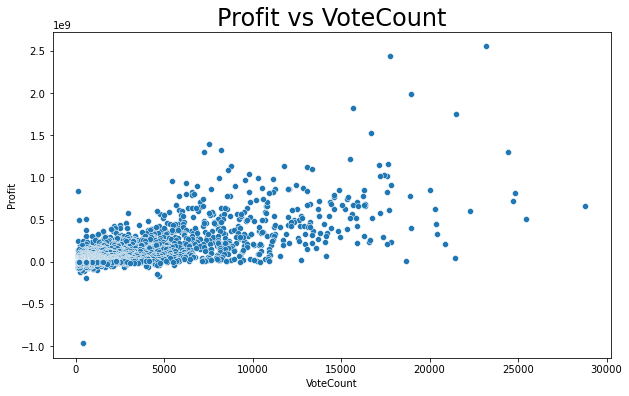

In [119]:
#Plotting VoteCount versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteCount", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteCount", y="Profit")

<AxesSubplot:title={'center':'Profit vs VoteAvg'}, xlabel='VoteAvg', ylabel='Profit'>

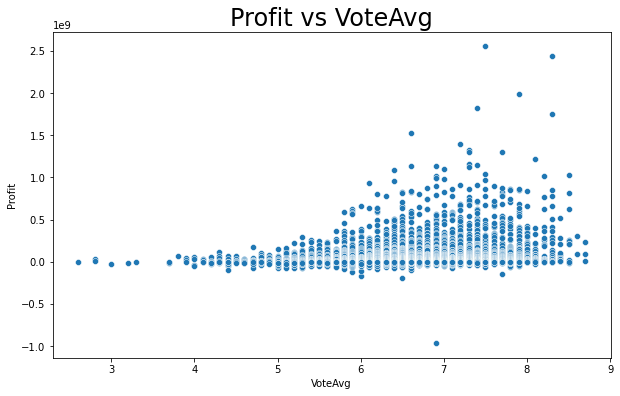

In [120]:
#Plotting VoteAvg versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteAvg", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteAvg", y="Profit")

In [121]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

,Budget,Popularity,VoteAvg,VoteCount,Revenue,Profit,Runtime,Year,Month
0,356000000.0,266.554,8.3,17776.0,2.797801e+09,2.441801e+09,181.0,2019,4
1,237000000.0,91.055,7.5,23164.0,2.787965e+09,2.550965e+09,162.0,2009,12
2,200000000.0,76.323,7.9,18970.0,2.187464e+09,1.987464e+09,194.0,1997,11
3,245000000.0,51.502,7.4,15668.0,2.068224e+09,1.823224e+09,136.0,2015,12
4,300000000.0,283.248,8.3,21470.0,2.046240e+09,1.746240e+09,149.0,2018,4


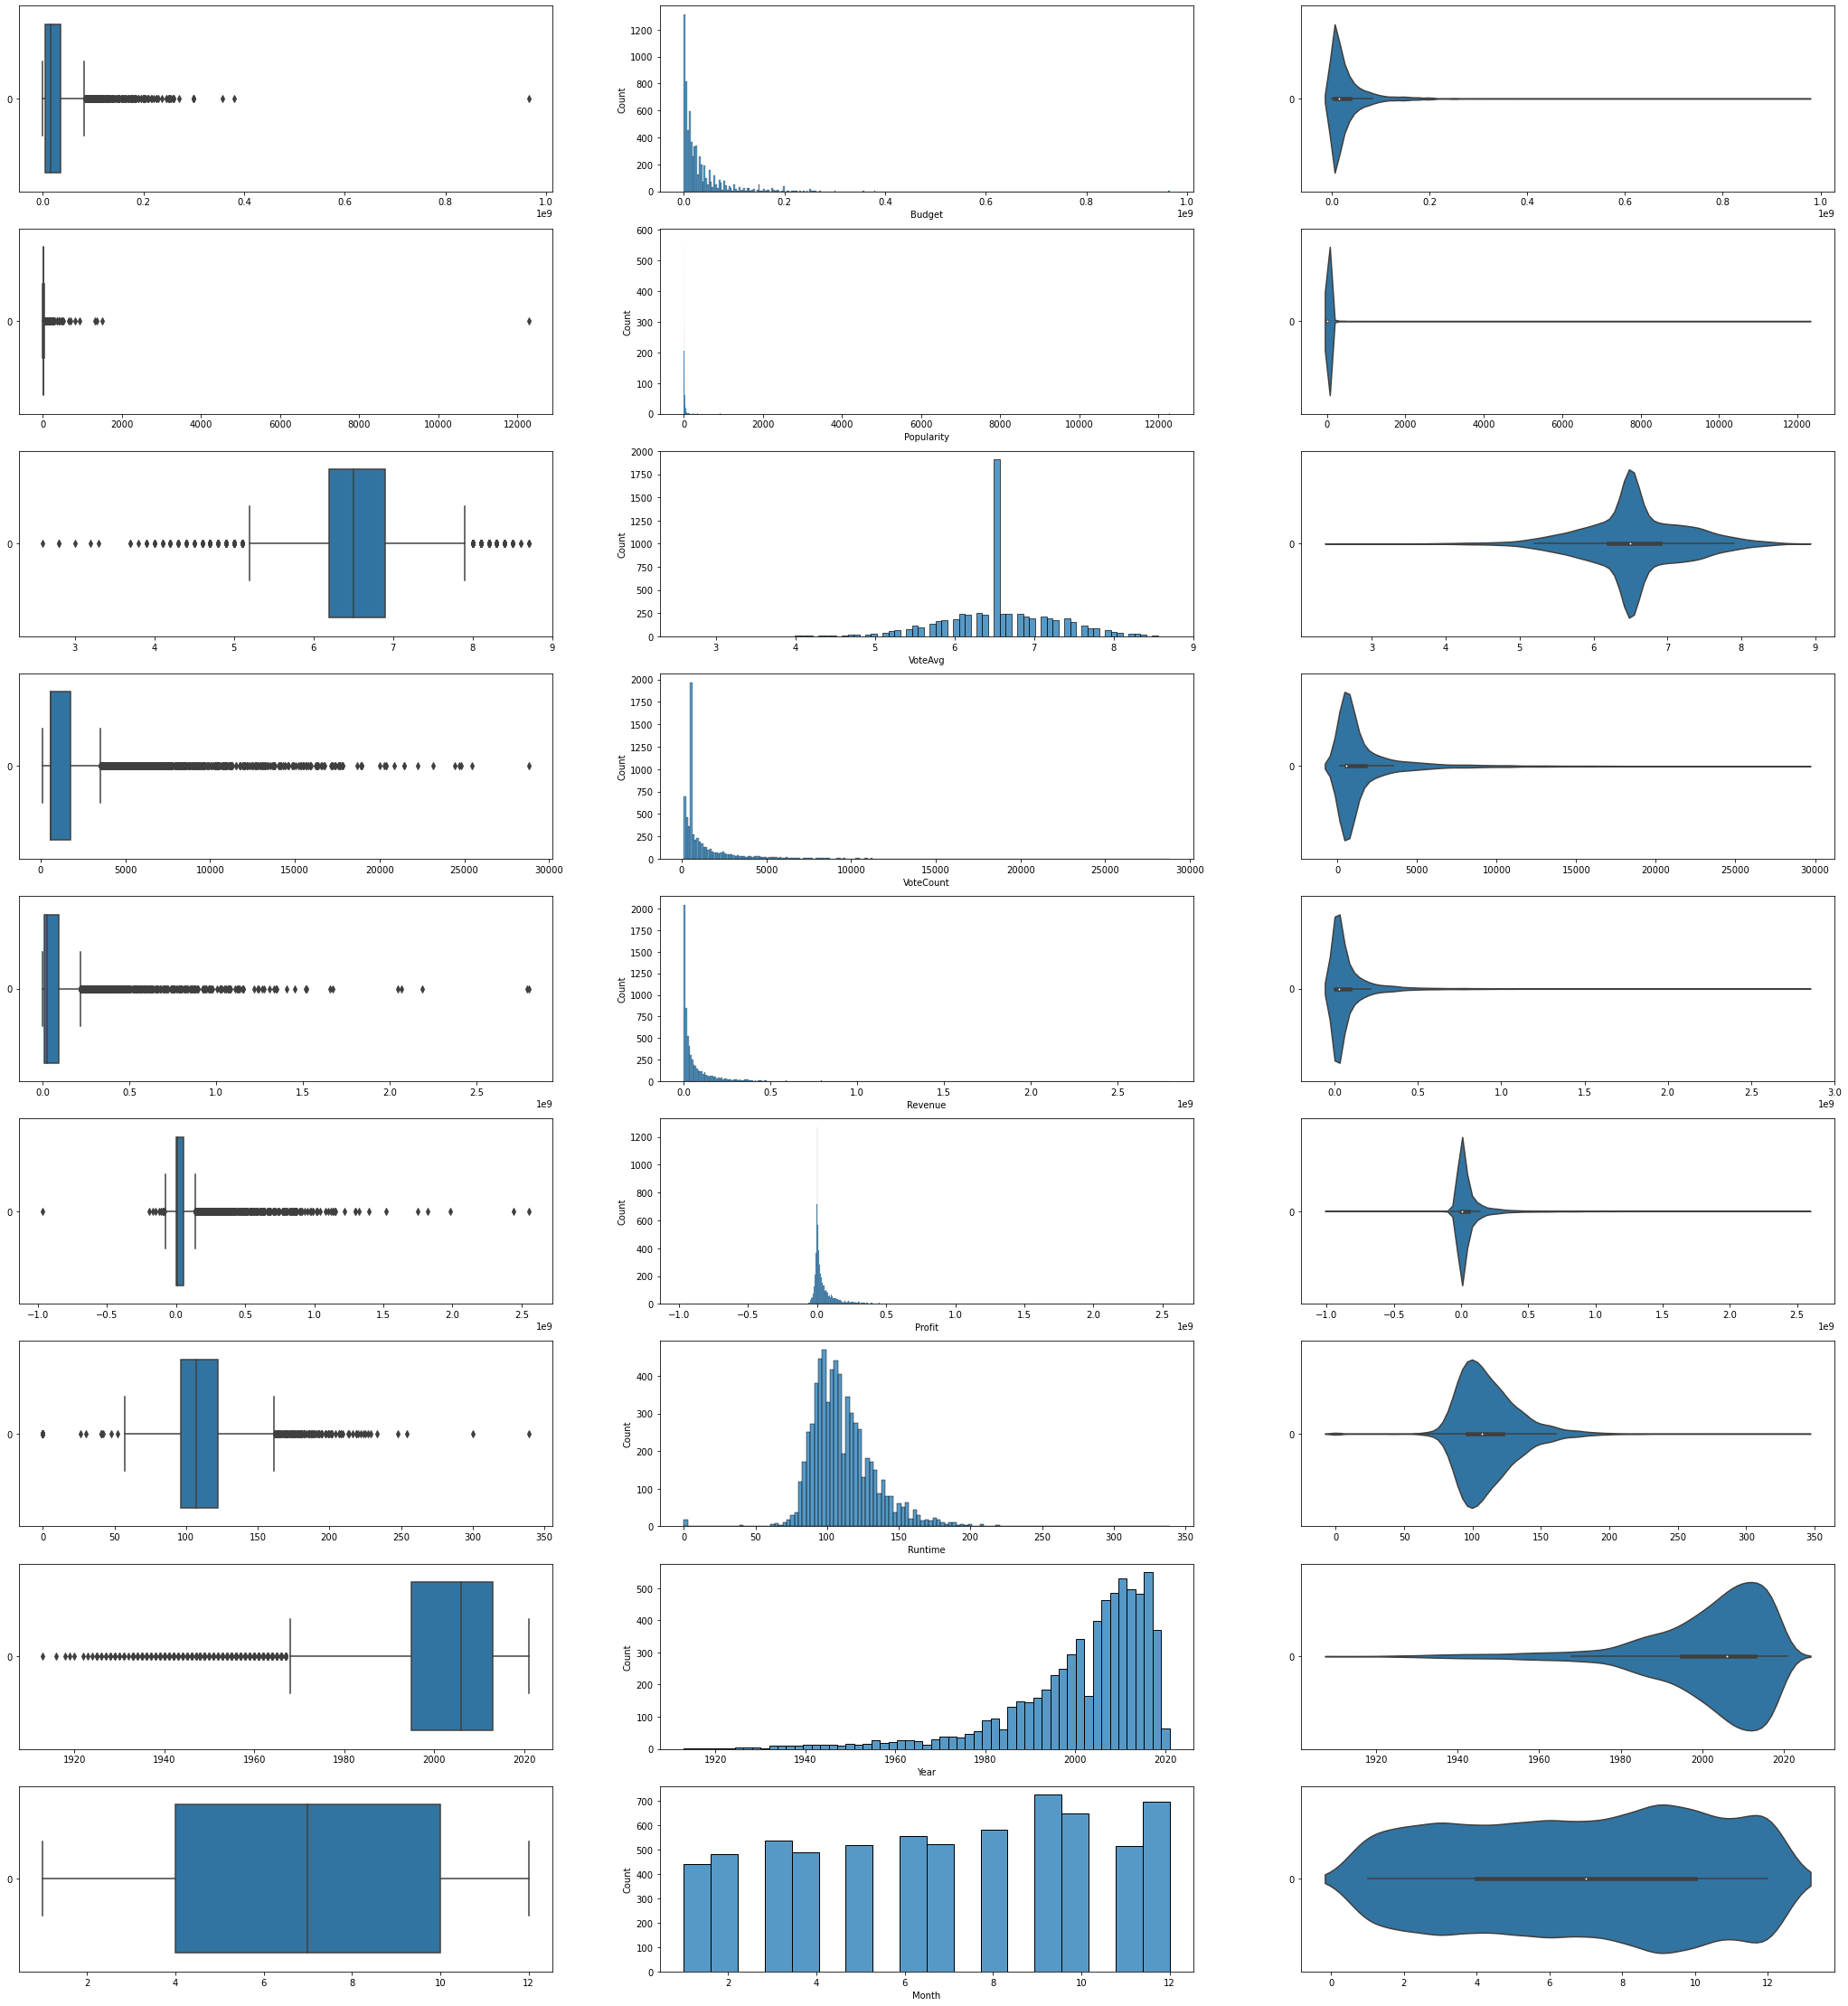

In [122]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.124344 -0.020311   0.551825  0.709089  0.551682   
Popularity  0.124344    1.000000  0.057308   0.090019  0.096016  0.077877   
VoteAvg    -0.020311    0.057308  1.000000   0.365353  0.174883  0.212693   
VoteCount   0.551825    0.090019  0.365353   1.000000  0.760802  0.741508   
Revenue     0.709089    0.096016  0.174883   0.760802  1.000000  0.979299   
Profit      0.551682    0.077877  0.212693   0.741508  0.979299  1.000000   
Runtime     0.135479    0.008930  0.296438   0.166930  0.154639  0.144024   
Year        0.219336    0.053306 -0.155164   0.152950  0.151583  0.116336   
Month       0.031201   -0.011697  0.105303   0.033130  0.032208  0.029141   

             Runtime      Year     Month  
Budget      0.135479  0.219336  0.031201  
Popularity  0.008930  0.053306 -0.011697  
VoteAvg     0.296438 -0.155164  0.105303  
VoteCount   0.166930  0.152950  0.033130  
Revenue     0.

<AxesSubplot:>

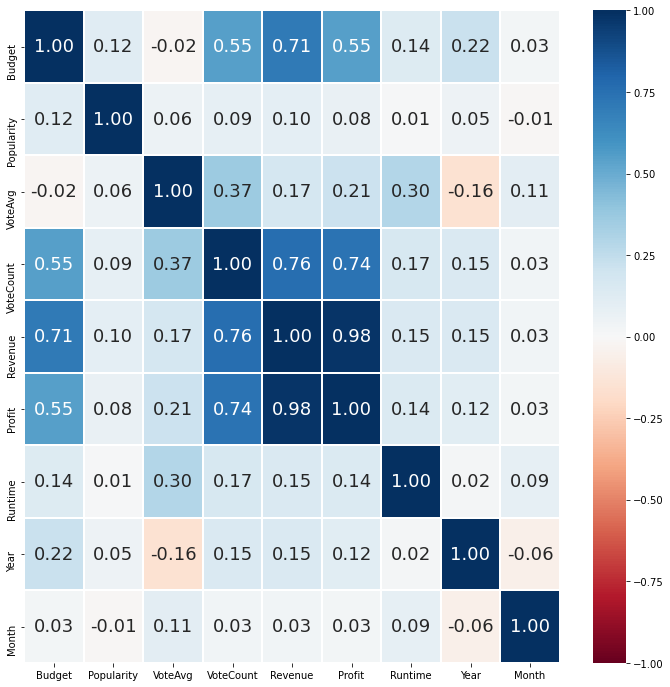

In [123]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

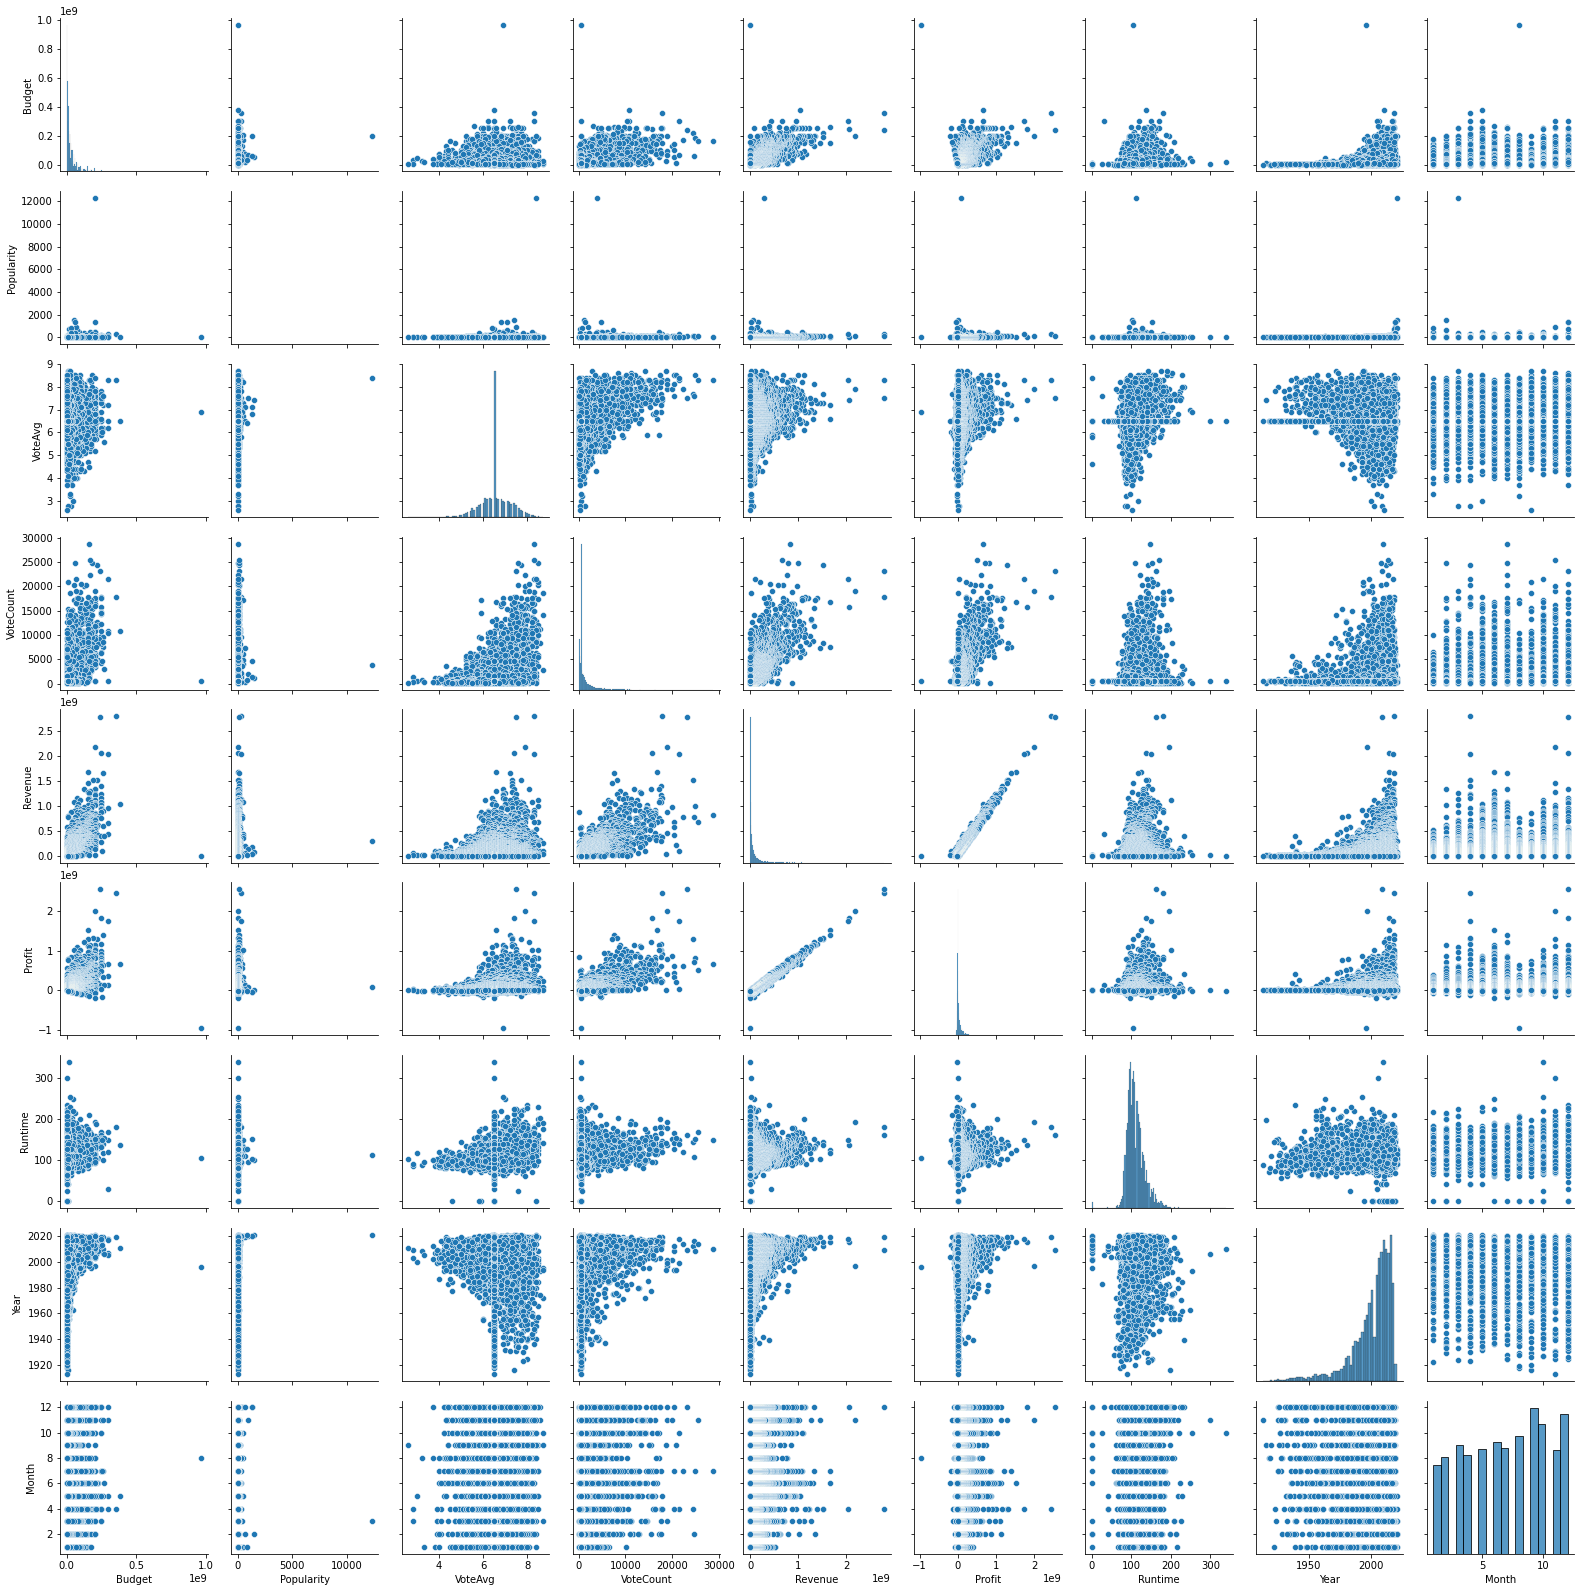

In [124]:
sb.pairplot(data = NumericData)

## Categorical Data

In [125]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

In [126]:
Genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Profit,Year
Movie_name,,,,,,,,,,,,,,,,,,,,,
#살아있다,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7116285.0,2020
'71,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,-7800000.0,2014
'N Beetje Verliefd,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,166214.0,2006
(500) Days of Summer,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,53222734.0,2009
(T)Raumschiff Surprise - Periode 1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,67341401.0,2004


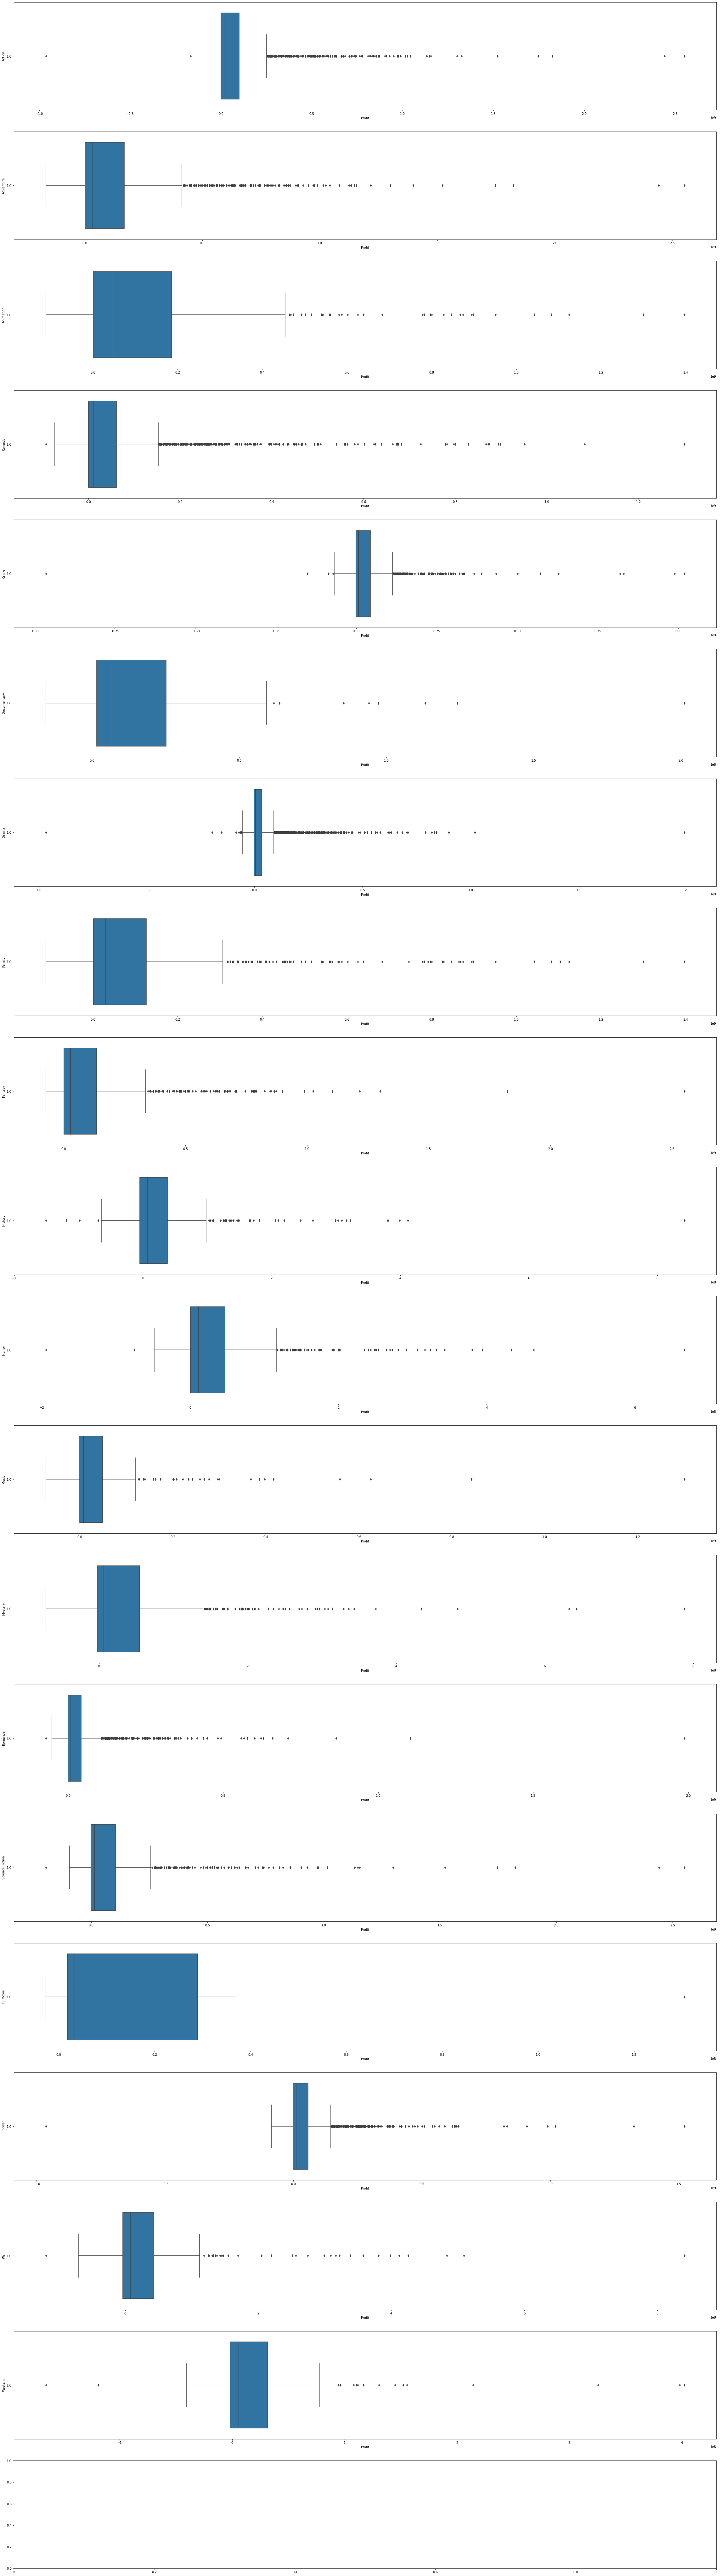

In [127]:
f, axes = plt.subplots(len(Genre.columns)-1, 1, figsize=(40, 150))
count = 0
for var in Genre.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = Genre[var], x = Genre['Profit'], orient = "h", ax = axes[count])
    count+=1

In [128]:
df = Genre.melt(id_vars=['Year',"Profit"], var_name="Genre",value_name="Value")
df = df.sample(frac=0.25,axis='rows')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31858 entries, 13833 to 20235
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    31858 non-null  int64  
 1   Profit  31858 non-null  float64
 2   Genre   31858 non-null  object 
 3   Value   4282 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [129]:
df.head(100)

,Year,Profit,Genre,Value
13833,2006,11006849.0,Animation,NaN
102465,2014,369076069.0,TV Movie,NaN
116666,2013,-368253.0,War,NaN
84002,1960,3375000.0,Mystery,NaN
53300,2000,0.0,Family,NaN
98568,2016,9803648.0,Science Fiction,NaN
22331,2002,324257136.0,Comedy,1.0
97491,2002,-334351.0,Science Fiction,NaN
105031,2014,508962323.0,TV Movie,NaN
74693,2001,33375151.0,Music,NaN


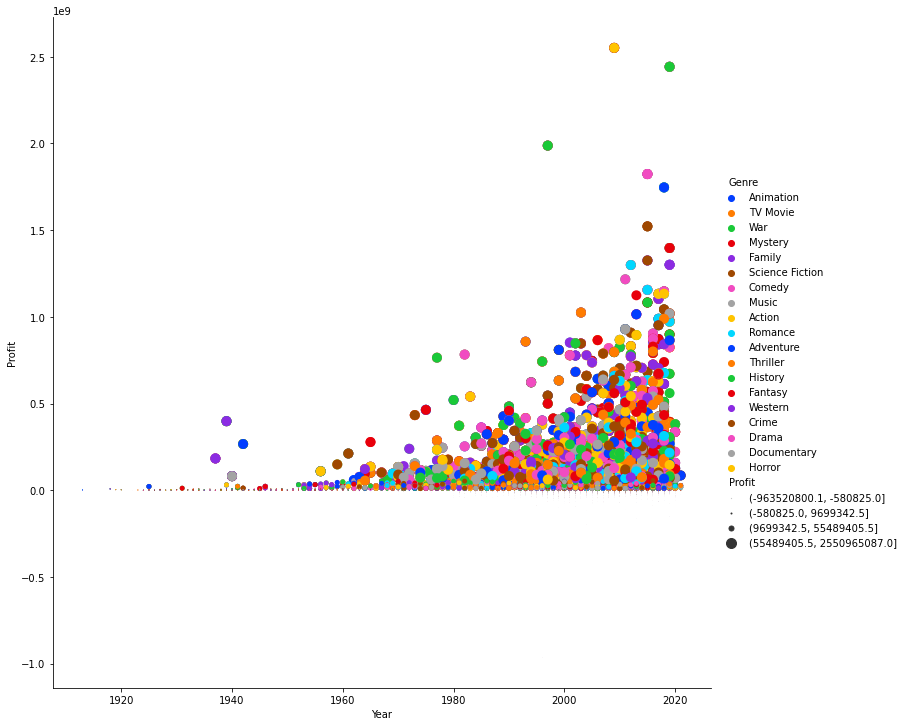

In [130]:
sb.relplot(x=df['Year'],y=df['Profit'],hue=df['Genre'], size = pd.qcut(df["Profit"], 4, precision=1),
                sizes=[0.01, 1, 25, 100], palette="bright", height = 10)


## For Production Companies, there are over 7000 unique companies. To deal with this overload of categorical data, we bin the companies into 4 categories based on their movie count frequency. 

In [64]:
ProComDic ={}
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] +=1

In [65]:
print(ProComDic)

{'Marvel Studios': 5, 'Dune Entertainment': 1, 'Lightstorm Entertainment': 2, '20th Century Fox': 2, 'Ingenious Media': 1, 'Paramount': 2, 'Lucasfilm Ltd.': 2, 'Bad Robot': 1, 'Amblin Entertainment': 2, 'Legendary Pictures': 2, 'Universal Pictures': 4, 'DENTSU': 3, 'The Kennedy/Marshall Company': 1, 'Walt Disney Pictures': 6, 'Fairview Entertainment': 1, 'Abu Dhabi Film Commission': 1, 'China Film Co.': 2, 'Original Film': 2, 'Fuji Television Network': 1, 'Québec Production Services Tax Credit': 1, 'Colorado Office of Film, Television & Media': 1, 'MRC': 1, 'One Race': 2, 'Walt Disney Animation Studios': 2, 'Warner Bros. Pictures': 1, 'Heyday Films': 1, 'Perfect World Pictures': 1, 'Mandeville Films': 1, 'Pixar': 1, 'Fuji Eight Company Ltd.': 1}


In [53]:
ProComBin={}


others = [x[0] for x in ProComDic.items() if x[1]<=20]
small = [x[0] for x in ProComDic.items() if 20<x[1]<=75]
medium = [x[0] for x in ProComDic.items() if 75<x[1]<=150]
large = [x[0] for x in ProComDic.items() if 150<x[1]]
        

['Lightstorm Entertainment', 'Bad Robot', 'Fairview Entertainment', 'Abu Dhabi Film Commission', 'China Film Co.', 'Fuji Television Network', 'Québec Production Services Tax Credit', 'Colorado Office of Film, Television & Media', 'One Race', 'Heyday Films', 'Mandeville Films', 'Fuji Eight Company Ltd.', 'DMG Entertainment', 'Illumination Entertainment', 'The Safran Company', 'Rodeo FX', 'Panoramic Pictures', 'DC Films', 'Cruel & Unusual Films', 'Pascal Pictures', 'Stereo D', 'Hasbro', 'Tom DeSanto & Don Murphy Production', 'WingNut Films', 'The Saul Zaentz Company', 'Danjaq', 'B23', 'Syncopy', 'Joint Effort', 'Bron Studios', 'Creative Wealth Media Finance', 'Second Mate Productions', 'Lin Pictures', 'Rideback', 'Marc Platt Productions', 'Moving Picture Company', 'Roth Films', 'Team Todd', 'Tim Burton Productions', 'The Zanuck Company', 'Isobel Griffiths', '1492 Pictures', 'Radar Pictures', 'Matt Tolmach Productions', 'Seven Bucks Productions', '3Foot7', 'Pacific Data Images', 'Patalex 

In [ ]:
Movie_CleanedData.head()

In [ ]:
ProCom = Move_CleanedData
ProCom['ProductionCompany'] = ProCom.where()

# ProCom = pd.get_dummies(Genre).groupby(level=0).sum()
# ProCom = ProCom.replace(0,np.nan)
# Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
# ProCom['Profit'] = Movie_CleanedData.Profit
# ProCom['Year'] = Movie_CleanedData.Year

# Linear Regression on Numeric Data

Response Variable : Profit
    
Predictor Variables : Budget, Popularity, VoteAvg, VoteCount, Revenue, Runtime, Year, Month

In [131]:
# Year, Month

Regression Model :  Total =  𝑎1xBudget + a2xPopularity + a3xVoteAvg + a4xVoteCount + a5xRevenue + a6xRuntime + b 

In [141]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [142]:
# Extract Response and Predictors
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = pd.DataFrame(Movie_CleanedData[['Budget', 'Popularity', 'VoteAvg', 'VoteCount', 'Revenue', 'Runtime', 'Year','Month']])

In [143]:
# Splitting the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5030 entries, Gone in 60 Seconds to Dark Phoenix
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Budget      5030 non-null   float64
 1   Popularity  5030 non-null   float64
 2   VoteAvg     5030 non-null   float64
 3   VoteCount   5030 non-null   float64
 4   Revenue     5030 non-null   float64
 5   Runtime     5030 non-null   float64
 6   Year        5030 non-null   int64  
 7   Month       5030 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 353.7+ KB


In [145]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression()

In [146]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [2.16066837e-07]
Coefficients of Regression 	: a =  [[-1.00000000e+00  1.89857722e-10 -2.82248911e-08  1.66207142e-11
   1.00000000e+00  1.64338258e-11  1.10514174e-12 -2.52970352e-11]]


In [147]:
#Printing coefficients against predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

   Predictors  Coefficients
0      Budget -1.000000e+00
1  Popularity  1.898577e-10
2     VoteAvg -2.822489e-08
3   VoteCount  1.662071e-11
4     Revenue  1.000000e+00
5     Runtime  1.643383e-11
6        Year  1.105142e-12
7       Month -2.529704e-11



In [148]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

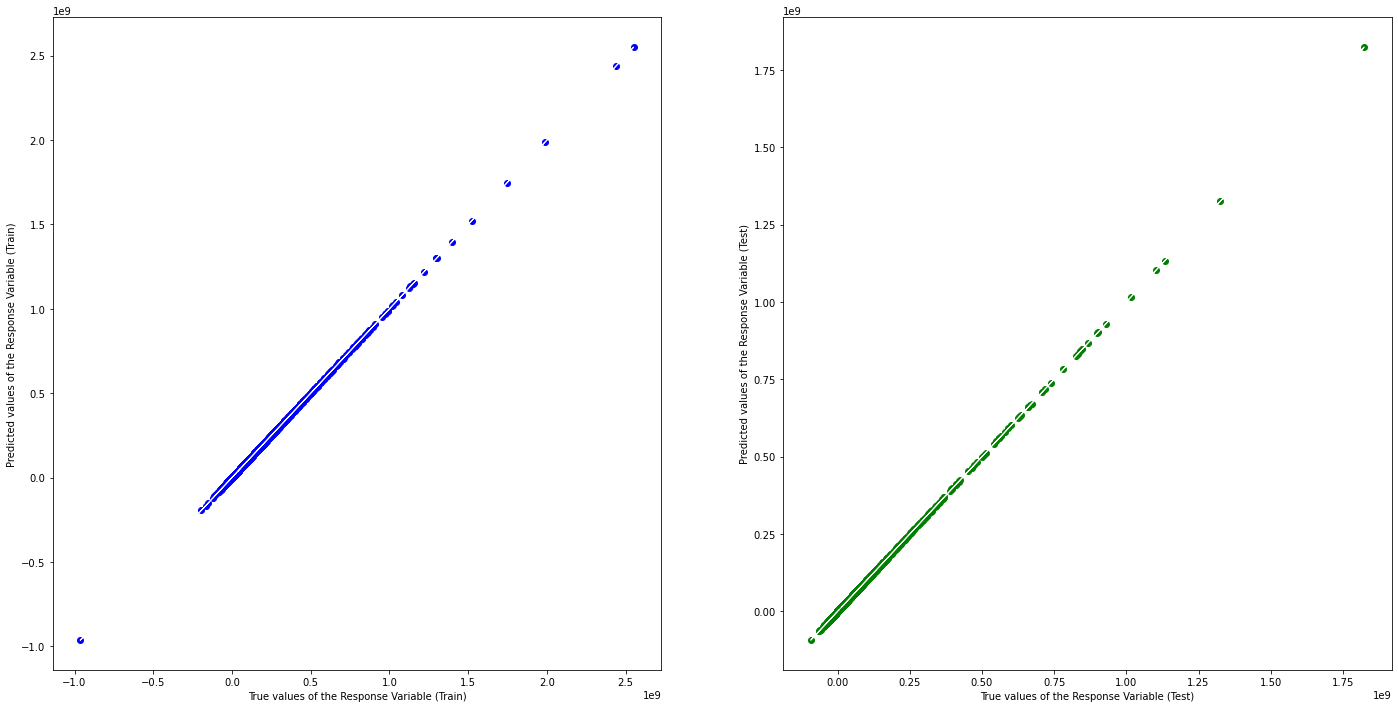

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 6.6361322411317066e-15

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 5.026719657562447e-15




In [149]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

print()